# Decision Trees for Classification

[<font color='#E8800A'>1 - Building a Decision Tree</font>](#first-bullet) <br>
[<font color='#E8800A'>2 - Avoiding Overfitting (Prepruning) </font>](#second-bullet) <br>
[<font color='#E8800A'>3 - Feature importance with Decision Trees</font>](#third-bullet) <br>

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

import time

from sklearn import tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

diabetes = pd.read_csv(r'diabetes.csv')
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [31]:
def avg_score(model):
    # apply kfold
    skf = StratifiedKFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in skf.split(X,y):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)

In [6]:
# in anaconda prompt: conda install python-graphviz
# !pip install pydotplus
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

def plot_tree(model):
    dot_data = export_graphviz(model,
                               feature_names=X_train.columns,  
                               class_names=["No Diabetes", "Diabetes"],
                               filled=True)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.set_size('"20,20"')
    return graphviz.Source(pydot_graph.to_string())

In [7]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

<div class="alert alert-block alert-info">
<a class="anchor" id="first-bullet">     
    

# 1. Building a Decision Tree

</a>
    
</div>

__`Step 1`__ - Create an instance of DecisionTreeClassifier with the default parameters and name it as __dt_gini__

In [8]:
dt_gini = DecisionTreeClassifier()

__`Step 2`__ - Fit your data to the model __dt_gini__ <br>

In [9]:
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier()

__`Step 3`__ __Predicted Values__ <br>
a) Check the predicted values for the test dataset using the method __predict()__ in your model<br>

In [10]:
y_pred = dt_gini.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

b) Check the predicted class probabilities for the test dataset using the method __predict_proba()__ in your model<br>

In [11]:
y_pred_prob = dt_gini.predict_proba(X_test)
y_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

__`Step 4`__ Check the depth (__get_depth()__), the number of nodes (__.tree_.node_count__) and the number of leaves (__get_n_leaves()__) of the model __dt_gini__

In [12]:
print('The defined three has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + 
      ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')

The defined three has a depth of 14, 203 nodes and a total of 102 leaves.


### <font color='#E8800A'>criterion | </font>  <font color='#3a7f8f'>Changing the split criteria</font><br><br>`default = 'gini'`

- A decision tree is split by using the impurity - a measure of homogeneity of the labels on the node.
- There are two possibilities in sklearn:
    - Gini Index - Gini Impurity measures the divergences between the probability distributions of the target attribute’s values and splits a node such that it gives the least amount of impurity.
    - Entropy - Information gain uses the entropy measure as the impurity measure and splits a node such that it gives the most amount of information gain.
    
- In most cases, the choice of splitting criteria will not make much difference in the performance of the model. However, and according to the "No free lunch Theorem", each criterion is superior in some cases and inferior in others.
- The main difference is that entropy might be a little slower to compute because it requires you to compute a logarithmic function

__`Step 5`__ - Create an instance of DecisionTreeClassifier named as __dt_entropy__ and define the parameter __criterion='entropy'__, and fit the data to your model. Check the results.

In [13]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)

In [14]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Gini','Entropy'])
show_results(df,dt_gini, dt_entropy)

,Time,Train,Test
Gini,0.002+/-0.0,1.0+/-0.0,0.71+/-0.06
Entropy,0.003+/-0.0,1.0+/-0.0,0.7+/-0.06


<div class="alert alert-block alert-info">
<a class="anchor" id="second-bullet">     

# 2. Avoiding Overfitting
    
</a>
</div>

<div class="alert alert-block alert-success">

## Prepruning a tree

[2.1. - The splitter](#splitter) <br>
[2.2. - The maximum depth](#depth)<br>
[2.3. - The minimum number of samples required to split](#samples)<br>
[2.4. - The minimum samples in each leaf](#leaf)<br>
[2.5. - The maximum number of features](#features)<br>
[2.6. - The maximum number of leaf nodes](#nodes)<br>
[2.7. - The minimum impurity decrease](#decrease)<br>

</div>

### <font color='#E8800A'>splitter| </font>  <font color='#3a7f8f'>Changing the splitter</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 'best'`

If random, it selects a random feature and a random split in each feature. 
- It's less computation intensive than calculating the optimal split of every feature at every leaf.
- It should be less prone to overfitting.

__`Step 6`__ - Create an instance of DecisionTreeClassifier named as __dt_random__ and define the parameter __splitter='random'__, and fit the data to your model. Check the results.

In [15]:
dt_random = DecisionTreeClassifier(splitter = 'random').fit(X_train, y_train)

In [16]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['best','random'])
show_results(df,dt_gini, dt_random)

,Time,Train,Test
best,0.002+/-0.0,1.0+/-0.0,0.714+/-0.07
random,0.001+/-0.0,1.0+/-0.0,0.663+/-0.04


### <font color='#E8800A'>max_depth | </font>  <font color='#3a7f8f'>Changing the maximum depth of a tree</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 'None'`



- If you don’t specify a depth for the tree, scikit-learn will expand the nodes until all leaves are pure (unless other parameters are defined)
- The deeper you allow your tree to grow, the more complex your model will be. 
- __`High Depth`__ - This will increase the number of slipts and captures more information about the data. However, this is one of the major causes associated with overfitting, since your model will fit perfectly for the training data, and it will not be able to generalize well on test. 
- __`Low Depth`__ - This is one of the major causes associated with underfitting.


__`Step 7`__ - Create an instance of DecisionTreeClassifier named as __dt_depth2__ and define the parameter __max_depth=2__, and fit the data to your model. Check the results.

In [17]:
dt_depth2 = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

In [18]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['full','depth2'])
show_results(df,dt_gini, dt_depth2)

,Time,Train,Test
full,0.002+/-0.0,1.0+/-0.0,0.702+/-0.07
depth2,0.001+/-0.0,0.769+/-0.01,0.74+/-0.03


__`Step 8`__ - Use the package graphviz to visualize the Decision Tree just created.

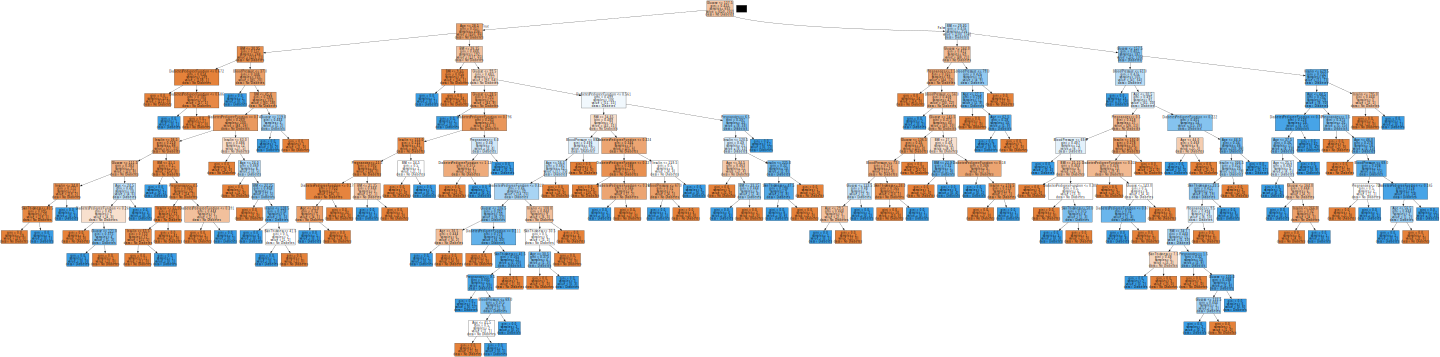

In [19]:
plot_tree(dt_gini)

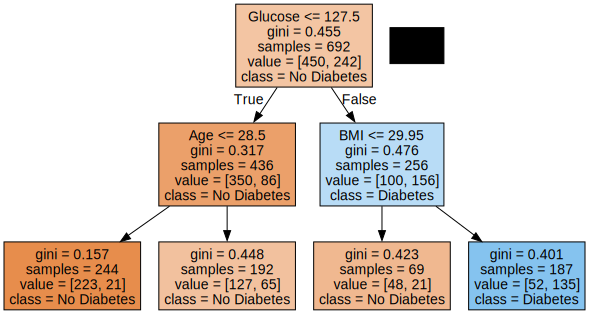

In [20]:
plot_tree(dt_depth2)

__`Step 8C`__ - Check the predicted class probabilities for the test dataset using the method __predict_proba()__ in the model dt_depth2.<br>

In [21]:
X_test.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
511,0,139,62,17,210,22.1,0.207,21


In [22]:
y_pred_prob = dt_depth2.predict_proba(X_test)
y_pred_prob

array([[0.69565217, 0.30434783],
       [0.69565217, 0.30434783],
       [0.91393443, 0.08606557],
       [0.27807487, 0.72192513],
       [0.91393443, 0.08606557],
       [0.27807487, 0.72192513],
       [0.66145833, 0.33854167],
       [0.91393443, 0.08606557],
       [0.91393443, 0.08606557],
       [0.66145833, 0.33854167],
       [0.91393443, 0.08606557],
       [0.66145833, 0.33854167],
       [0.91393443, 0.08606557],
       [0.91393443, 0.08606557],
       [0.66145833, 0.33854167],
       [0.66145833, 0.33854167],
       [0.91393443, 0.08606557],
       [0.27807487, 0.72192513],
       [0.91393443, 0.08606557],
       [0.91393443, 0.08606557],
       [0.91393443, 0.08606557],
       [0.69565217, 0.30434783],
       [0.91393443, 0.08606557],
       [0.27807487, 0.72192513],
       [0.27807487, 0.72192513],
       [0.66145833, 0.33854167],
       [0.66145833, 0.33854167],
       [0.27807487, 0.72192513],
       [0.66145833, 0.33854167],
       [0.66145833, 0.33854167],
       [0.

### <font color='#E8800A'>min_samples_split |</font>  <font color='#3a7f8f'>Changing the minimum number of samples required to split an internal node</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 2`

- An internal node can have further splits (on the other hand, leafs is a node without children)
- It is used to control overfitting
- __`High Values`__ - Prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
- __`Too high Values`__ - Can lead to underfitting

__`Step 9`__ - Create an instance of DecisionTreeClassifier named as __dt_min200__ and define the parameter __min_samples_split=200__, and fit the data to your model.

In [23]:
dt_min200 = DecisionTreeClassifier(min_samples_split = 200).fit(X_train, y_train)

__`Step 10`__ - Create an instance of DecisionTreeClassifier named as __dt_min700__ and define the parameter __min_samples_split=700__, and fit the data to your model. Check the results for both models.

In [24]:
dt_min700 = DecisionTreeClassifier(min_samples_split =700).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['dt_min200','dt_min700'])
show_results(df, dt_min200, dt_min700)

,Time,Train,Test
dt_min200,0.001+/-0.0,0.775+/-0.01,0.743+/-0.04
dt_min700,0.001+/-0.0,0.651+/-0.0,0.651+/-0.0


__`Step 11`__ Plot the decision tree __dt_min700__

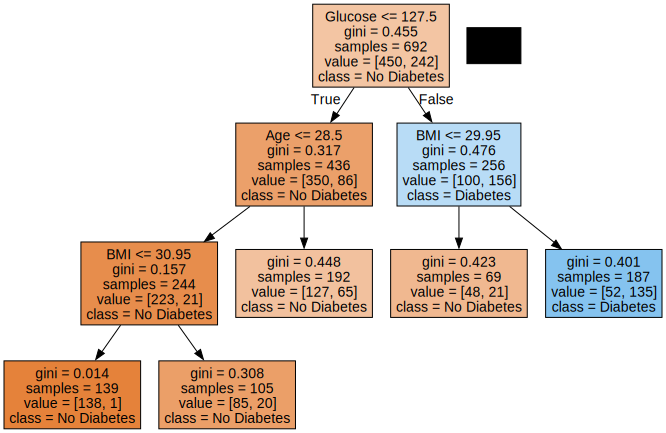

In [25]:
plot_tree(dt_min200)

### <font color='#E8800A'>min_samples_leaf |</font> <font color='#3a7f8f'>Changing the minimum number of samples required to be at a leaf node</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 1`

- A leaf is a node without children
- It is used to control overfitting, by defining that each leaf has more than one element
- __`Small Values`__ - The tree will overfit
- __`Too high Values`__ - Can lead to underfitting

__`Step 12`__ - Create an instance of DecisionTreeClassifier named as __dt_min_sam100__ and define the parameter __min_samples_split=100__, and fit the data to your model

In [26]:
dt_min_sam100 = DecisionTreeClassifier(min_samples_leaf = 100).fit(X_train, y_train)

__`Step 13`__ - Create an instance of DecisionTreeClassifier named as __dt_min_sam500__ and define the parameter __min_samples_split=500__, and fit the data to your model. Compare the results between the baseline model and the models created in step12 and step13

In [27]:
dt_min_sam500 = DecisionTreeClassifier(min_samples_leaf = 500).fit(X_train, y_train)

In [28]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Original','dt_min_sam100','dt_min_sam500'])
show_results(df,dt_gini, dt_min_sam100, dt_min_sam500)

,Time,Train,Test
Original,0.002+/-0.0,1.0+/-0.0,0.704+/-0.07
dt_min_sam100,0.001+/-0.0,0.749+/-0.0,0.734+/-0.03
dt_min_sam500,0.001+/-0.0,0.651+/-0.0,0.651+/-0.0


__`Step 14`__ Plot the decision tree __dt_min_sam500__

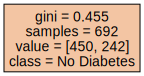

In [29]:
plot_tree(dt_min_sam500)

### <font color='#E8800A'>max_features |</font> <font color='#3a7f8f'>Changing the number of features to consider when looking for the best split</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 'None'`

- It is computationally heavy to look at all the features every single time, so you can just check some of them using the various max_features options
- It also allows to minimize overfitting - by choosing a reduced number of features, we can increase the stability of the tree and reduce variance and overfitting

There are several options (let's imagine we are dealing with 32 variables): <br>
`int` - The defined value is the number of maximum features to be considered at each split
    - A value of 10 will consider 10 features <br>
`float` - The defined value will be multiplied by the number of features and those are considered to each split
    - A value of 0.5 will consider 16 features<br>
`auto` - The number of features considered is equal to sqrt(total number of features)
    - It will be considered 6 features<br>
`log2` - The number of features considered is equal to log2(total number of features)
    - It will be considered 5 features<br>
`None`- The number of features considered is equal to the total number of features
    - 32 variables will be considered<br>
    
The option to select will depend on the number of features you have, the computational intensity you want to reduce or the amount of overfitting you have, so if you have a high computational cost or you have a lot of overfitting, you can try with “log2” and depending on what that produces, you can either bring it slightly up using sqrt or take it down further using a custom float value.

__`Step 15`__ - Create the following instances of a DecisionTreeClassifier:
- where __max_features = None__ and name it as __dt_none__ (The baseline model)
- where __max_features = 2__ and name it as __dt_int__
- where __max_features = 0.5__ and name it as __dt_float__
- where __max_features = 'auto'__ and name it as __dt_auto__
- where __max_features = 'log2'__ and name it as __dt_log2__


Check the results.

In [33]:
dt_none = DecisionTreeClassifier(max_features = None).fit(X_train, y_train)
dt_int = DecisionTreeClassifier(max_features = 2).fit(X_train, y_train)
dt_float = DecisionTreeClassifier(max_features = 0.5).fit(X_train, y_train)
dt_auto = DecisionTreeClassifier(max_features = "sqrt").fit(X_train, y_train)
dt_log2 = DecisionTreeClassifier(max_features = 'log2').fit(X_train, y_train)

In [34]:
df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['None (Baseline)','Int','Float','Auto','Log2'])
show_results(df,dt_none, dt_int, dt_float, dt_auto, dt_log2)

,Time,Train,Test
None (Baseline),0.003+/-0.0,1.0+/-0.0,0.707+/-0.07
Int,0.001+/-0.0,1.0+/-0.0,0.673+/-0.06
Float,0.002+/-0.0,1.0+/-0.0,0.716+/-0.06
Auto,0.001+/-0.0,1.0+/-0.0,0.688+/-0.03
Log2,0.001+/-0.0,1.0+/-0.0,0.677+/-0.06


__`Step 16`__ - Create the following instances of a DecisionTreeClassifier:
- where __max_features = 2__ and __max_depth = 2__ and name it as __dt_int2__
- where __max_features = 2__ and __max_depth = 2__ and name it as __dt_int3__

In [35]:
dt_int2 = DecisionTreeClassifier(max_features = 2, max_depth = 2).fit(X_train, y_train)
dt_int3 = DecisionTreeClassifier(max_features = 2, max_depth = 2).fit(X_train, y_train)

__`Step 17`__ Plot the decision tree __dt_int2__

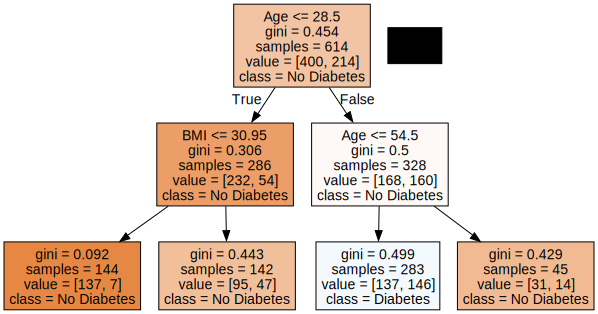

In [36]:
plot_tree(dt_int2)

__`Step 18`__ Plot the decision tree __dt_int3__

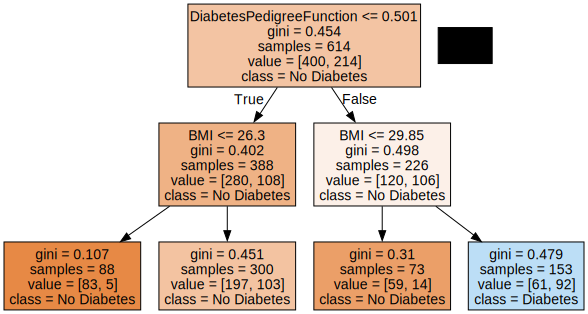

In [37]:
plot_tree(dt_int3)

### <font color='#E8800A'>max_leaf_nodes |</font> <font color='#3a7f8f'>Define the total number of leaf nodes</font> <a class="anchor" id="first-bullet"></a><br><br>`default = 'None'`

__`Step 19`__ - Create an instance of DecisionTreeClassifier named as __dt_maxleaf5__ and define the parameter __max_leaf_nodes=5__, and fit the data to your model. Compare the results with the baseline model.

In [38]:
dt_maxleaf5 = DecisionTreeClassifier(max_leaf_nodes = 5).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Baseline','dt_maxleaf5'])
show_results(df,dt_gini, dt_maxleaf5)

,Time,Train,Test
Baseline,0.002+/-0.0,1.0+/-0.0,0.708+/-0.07
dt_maxleaf5,0.002+/-0.0,0.777+/-0.01,0.742+/-0.04


__`Step 20`__ Plot the decision tree __dt_maxleaf5__

In [46]:
plot_tree(dt_maxleaf5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
761,9,170,74,31,0,44.0,0.403,43
212,7,179,95,31,0,34.2,0.164,60
60,2,84,0,0,0,0.0,0.304,21
310,6,80,66,30,0,26.2,0.313,41
568,4,154,72,29,126,31.3,0.338,37


### <font color='#E8800A'>min_impurity_decrease |</font> <font color='#3a7f8f'>Decide if a node will be split according to the decrease of impurity</font> <a class="anchor" id="first-bullet"></a><br><br>`default = '0.'`

A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

<img src="impurity.png" style="height:180px">

__`Step 21`__ - Create an instance of DecisionTreeClassifier named as __dt_impurity02__ and define the parameter __min_impurity_decrease=0.02__, and fit the data to your model. Compare the results with the baseline model.

In [40]:
dt_impurity02 = DecisionTreeClassifier(min_impurity_decrease=0.02).fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Test'], index = ['Baseline','dt_impurity02'])
show_results(df,dt_gini, dt_impurity02)

,Time,Train,Test
Baseline,0.003+/-0.0,1.0+/-0.0,0.706+/-0.08
dt_impurity02,0.001+/-0.0,0.767+/-0.01,0.734+/-0.03


__`Step 22`__ Plot the decision tree __dt_impurity02__

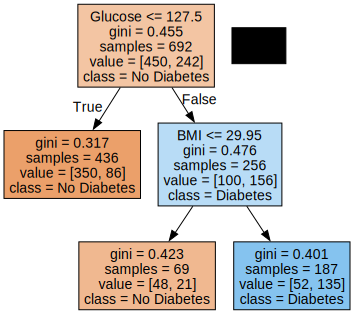

In [41]:
plot_tree(dt_impurity02)

<div class="alert alert-block alert-success">

## Exercise - Decide what is the maximum depth of a decision tree

</div>

__`Exercise 1`__ - Plot the average F1 Score, using StratifiedKFold, for train and validation dataset for trees where the depth range from 1 to 14 levels. Check what is the depth that is associated with the highest f1 score in train and the one in validation.

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

skf = StratifiedKFold(n_splits=10)

def return_results(max_depths):
    skf = StratifiedKFold()
    avg_scores_train=[]
    avg_scores_test=[]
    
    for value in max_depths:
        model = DecisionTreeClassifier(max_depth=value)
        scores_train = []
        scores_test = []
        
        for train_index, test_index in skf.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[train_index]
            
            model.fit(X_train, y_train)
            
            scores_train.append(f1_score(y_train, model.predict(X_train)))
            scores_test.append(f1_score(y_test, model.predict(X_test)))
            
        avg_scores_train.append(round(np.mean(scores_train),3))
        avg_scores_test.append(round(np.mean(scores_test),3))
        
        plt.plot(max_depths, avg_scores_train, label="Train")
        plt.plot(max_depths, avg_scores_test, label="Test")
        plt.xlabel("Depth")
        plt.ylabel("F1-Score")
        plt.legend()
        plt.show()
        
return_results(np.arange(1, 15))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

<div class="alert alert-block alert-info">
<a class="anchor" id="third-bullet">     
    
# 3. Use a decision tree to evaluate feature importance
</a>
</div>

__`Step 23`__ Calculate the feature importance using the split criteria 'Gini' and 'Entropy'

In [42]:
gini_importance = DecisionTreeClassifier().fit(X_train, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train).feature_importances_

__`Step 24`__ Plot the feature importances for both criterions

<Axes: xlabel='Value', ylabel='Col'>

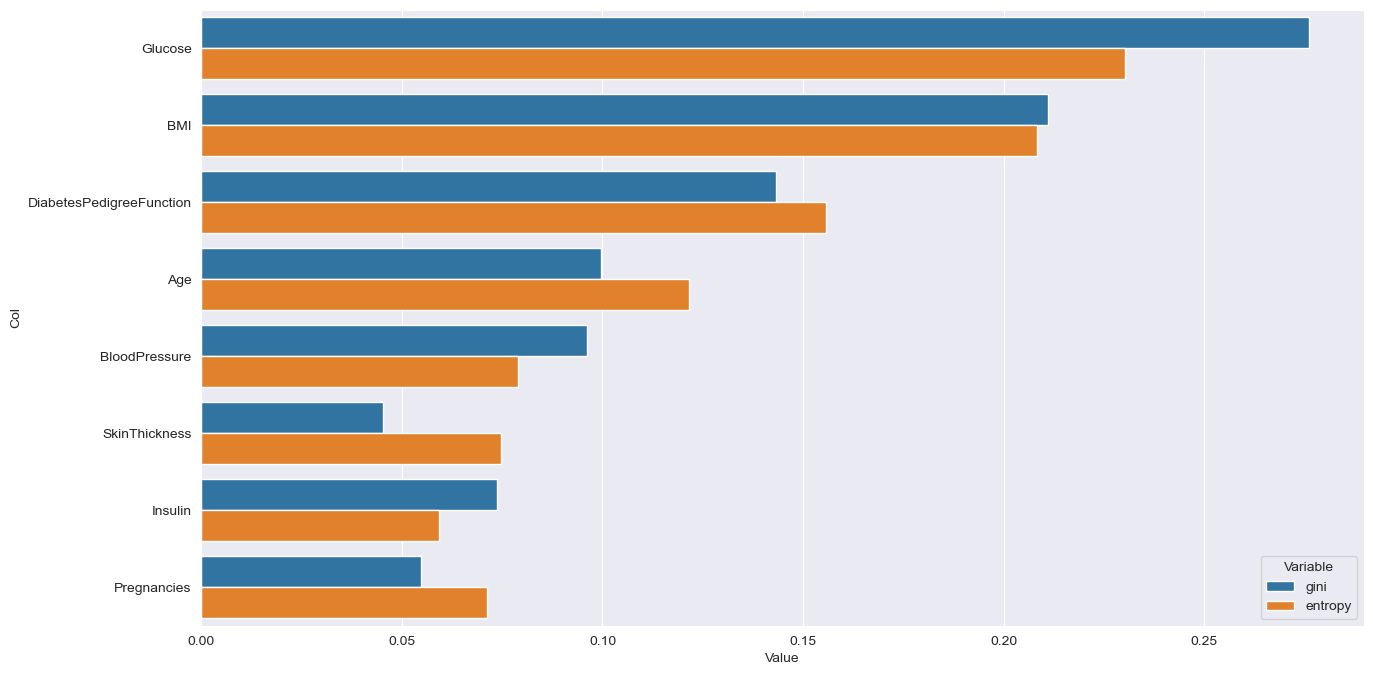

In [43]:
import seaborn as sns

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)